In [48]:
import pickle
import numpy
import keras

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization as BN

import matplotlib.pylab as plt
%matplotlib inline

In [7]:
datafile='/work/iam-data/pngs/output_shingles_sample.pkl'
split = 0.8

In [ ]:
data = pickle.load(open(datafile))
authors = data.keys()

# Thought this would help with speed by pre-initializing data matrix
imcount = 0
imcount += sum( len(data[author]) for author in authors )
randomdata = numpy.zeros( (imcount, 120, 120) )
randomclass = numpy.zeros( imcount )

# Load in all the data into matrix to pass to Keras
imcount = 0
authorcount = 0
for author in authors:
    for shard in data[author]:
        randomdata[imcount,:,:] = shard
        randomclass[imcount] =authorcount
        imcount+=1
    authorcount+=1
randomorder = numpy.random.permutation(imcount)
randomdata = randomdata[ randomorder, :, : ]
randomclass = randomclass[ randomorder ]

realsplit = int(split*imcount)
X_train = randomdata[0:realsplit,:,:]
Y_train = randomclass[0:realsplit]

X_train = numpy.expand_dims(X_train, 1)
Y_train = to_categorical(Y_train, authorcount)

X_test = randomdata[realsplit:,:,:]
Y_test = randomclass[realsplit:]

X_test = numpy.expand_dims(X_test, 1)
Y_test = to_categorical(Y_test, authorcount)

X_train/=255.0
X_test/=255.0
X_train = 1.0 - X_train
X_test = 1.0 - X_test

In [79]:
model = Sequential()
model.add(Convolution2D(10, 12, 12,
                        border_mode='full',
                        input_shape=(1, 120, 120)))
model.add(Activation('relu'))
    
model.add(Convolution2D(7, 6, 6))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

In [105]:
print "Compiling model" 
sgd = SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = SGD(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
# model.compile(loss='categorical_crossentropy', optimizer='adadelta')
print "Finished compilation"

Compiling model
Finished compilation


In [106]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=100, show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))

Train on 1312 samples, validate on 328 samples
Epoch 1/100
1312/1312 [==============================] - 4s - loss: 0.7430 - acc: 0.6883 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 2/100
1312/1312 [==============================] - 4s - loss: 0.7336 - acc: 0.6982 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 3/100
1312/1312 [==============================] - 4s - loss: 0.7145 - acc: 0.7058 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 4/100
1312/1312 [==============================] - 4s - loss: 0.7551 - acc: 0.6791 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 5/100
1312/1312 [==============================] - 4s - loss: 0.7251 - acc: 0.6989 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 6/100
1312/1312 [==============================] - 4s - loss: 0.7693 - acc: 0.6814 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 7/100
1312/1312 [==============================] - 4s - loss: 0.7216 - acc: 0.7035 - val_loss: 0.9240 - val_acc: 0.7134
Epoch 8/100
1312/1312 [==============================] - 4s - loss: 0.7

KeyboardInterrupt: 

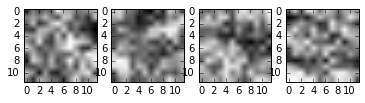

In [108]:
conv0 = model.layers[0].get_weights()[0]
conv0 = (conv0 - conv0.min()) / ( conv0.max()-conv0.min() )
conv0wn = conv0[8].squeeze()
conv1wn = conv0[0].squeeze()
conv2wn = conv0[2].squeeze()
conv3wn = conv0[4].squeeze()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.imshow(conv0wn, plt.get_cmap('gray'))
ax2.imshow(conv1wn, plt.get_cmap('gray'))
ax3.imshow(conv2wn, plt.get_cmap('gray'))
ax4.imshow(conv3wn, plt.get_cmap('gray'))

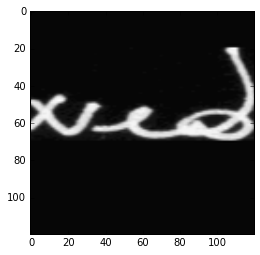

In [68]:
X_sample = X_train[10].squeeze()
plt.imshow(X_sample, cmap=plt.get_cmap('gray'))